In [ ]:
#KNN

Αρχικά κανονικοποιούμε τα δεδομένα με τον StandardScaler. Για κάθε δείγμα του test set υπολογίζουμε την Ευκλείδεια απόστασή
του από όλα τα δείγματα του training set και κρατάμε τους K πιο κοντινούς γείτονες.
Η τελική πρόβλεψη προκύπτει από την κλάση που εμφανίζεται συχνότερα ανάμεσα στους K γείτονες.

Mounted at /content/drive

---KNN algorithm---
Results for k =  1
Train Accuracy: 1.0000
Test Accuracy : 0.9444

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.88      0.94        17
           2       0.90      1.00      0.95         9

    accuracy                           0.94        36
   macro avg       0.94      0.96      0.95        36
weighted avg       0.95      0.94      0.94        36

Results for k =  2
Train Accuracy: 1.0000
Test Accuracy : 0.9444

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.88      0.94        17
           2       0.90      1.00      0.95         9

    accuracy                           0.94        36
   macro avg       0.94      0.96      0.95        36
weighted avg       0.95      0.94      0.94   

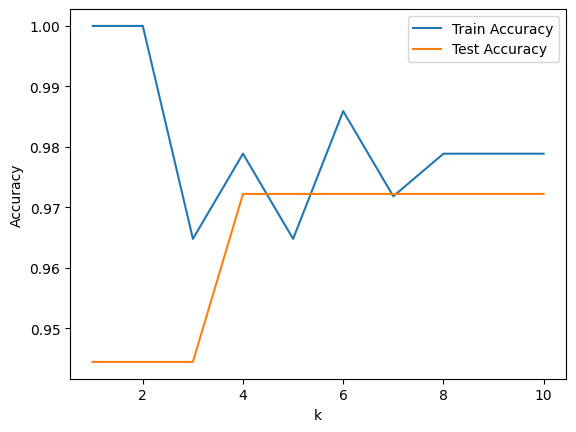

In [1]:
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from collections import Counter

from google.colab import drive
drive.mount('/content/drive')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

file_path = '/content/drive/MyDrive/wine_dataset.csv'

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KNN:

  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predicted_labels = [self._predict(x) for x in X]
    return np.array(predicted_labels)

  def _predict(self, x):
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

df = pd.read_csv(file_path)
X = df.drop('target', axis=1).values
y = df['target'].values


X_train_raw, X_test_raw, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

train_acc = []
test_acc = []
print("\n---KNN algorithm---")
for k in range(1,11):
  model = KNN(k)
  model.fit(X_train, y_train)

  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)
  train_acc.append(accuracy_score(y_train, train_preds))
  test_acc.append(accuracy_score(y_test, test_preds))
  print(f"Results for k =  {k}")
  print(f"Train Accuracy: {accuracy_score(y_train, train_preds):.4f}")
  print(f"Test Accuracy : {accuracy_score(y_test, test_preds):.4f}")

  print("\nClassification Report (Test Set):")
  print(classification_report(y_test, test_preds))

plt.figure()
plt.plot(range(1,11), train_acc, label="Train Accuracy")
plt.plot(range(1,11), test_acc, label="Test Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
